# **Klasifikace dat Adult**
Data description:

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous. This feature represents how many people have the same list of features.

* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, ...

## Načtení knihoven

In [1]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use
from matplotlib.gridspec import GridSpec
import plotly.express as py
import scipy
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, auc, classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Načteme si náš dataset do dataFramu z Pandasu

In [2]:
df = pd.read_csv('adult.csv', sep=',')
pd.set_option('display.max_columns', None)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# **Exploratory Data Analysis - EDA**

# Podíváme se na datové typy sloupců v datasetu

In [31]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

Dataset obsahuje jak číselné, tak kategorické hodnoty.

## Podíváme se, jestli nám chybí nějaké hodnoty

In [32]:
df.isna().sum().sort_values(ascending=False)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [56]:
df.describe(include=np.number)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Podíváme se na kategorické hodnoty

In [33]:
categorical_columns = df.select_dtypes(exclude=np.number).columns
categorical_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'class'],
      dtype='object')

In [35]:
df[categorical_columns].describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [39]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

V datasetu jsou prázdné hodnoty skryté pod ' ?'.

Změníme je na nan. A podíváme se znova na chybějící hodnoty

In [3]:
df = df.replace(' ?',np.nan)

In [4]:
df.isna().sum().sort_values(ascending=False)

occupation        1843
workclass         1836
native-country     583
age                  0
fnlwgt               0
education            0
education-num        0
marital-status       0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
class                0
dtype: int64

## Odstranění chybějících hodnot

In [5]:
df.dropna(inplace = True)
df.isna().sum().sort_values(ascending=False)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

## Odstranění stejných sloupců

Sloupce education a education-num mají stejný význam, jen education-num jsou numericky reprezentována, proto education můžeme odstranit.

In [6]:
df = df.drop(["education"], axis=1)
df

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Zastoupení osob podle věku

Text(0.5, 1.0, 'Počet osob se stejným věkem')

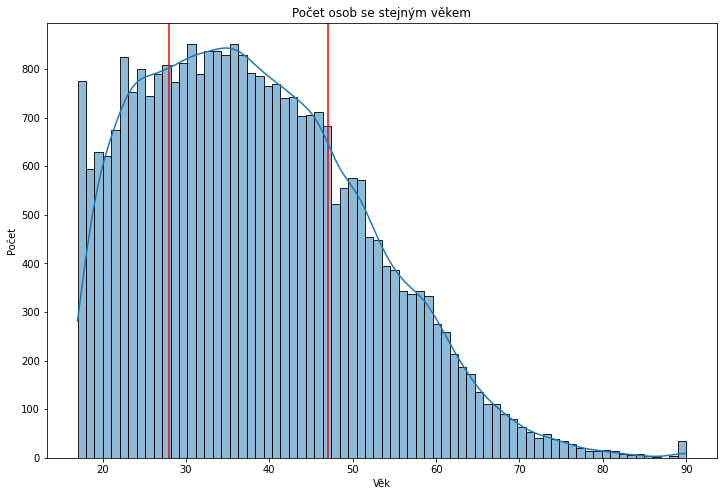

In [55]:
fig = plt.figure(figsize=(12,8))
plt.xlabel('Věk')
plt.ylabel('Počet')
plt.axvline(df.age.quantile(0.25),color='red')
plt.axvline(df.age.quantile(0.75),color='red')
sns.histplot(df.age,bins=72,kde=True).set_title('Počet osob se stejným věkem')

Nejvíce osob je mezi 28 a 47 věkem. Průměrný věk pak činí 38 let.

## Zastoupení osob podle dosaženého vzdělání 

Text(0.5, 1.0, 'Počet osob se stejným vzděláním')

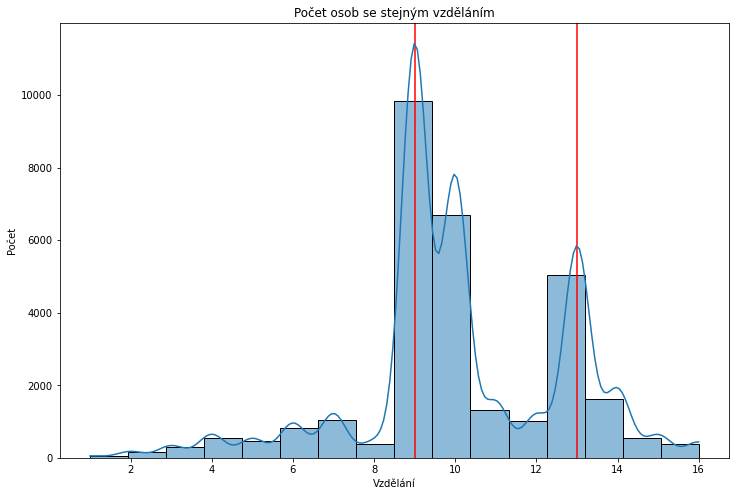

In [61]:
fig = plt.figure(figsize=(12,8))
plt.xlabel('Vzdělání')
plt.ylabel('Počet')
plt.axvline(df['education-num'].quantile(0.25),color='red')
plt.axvline(df['education-num'].quantile(0.75),color='red')
sns.histplot(df['education-num'],bins=16,kde=True).set_title('Počet osob se stejným vzděláním')

Nejvíce osob má vzdělání číslo 9. 

## Zastoupení osob podle odpracovaných hodin za týden

Text(0.5, 1.0, 'Počet osob se stejno pracovní dobou')

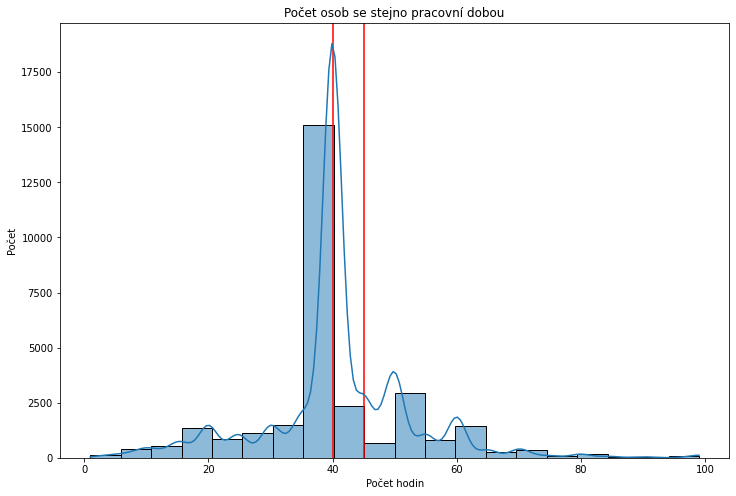

In [65]:
fig = plt.figure(figsize=(12,8))
plt.xlabel('Počet hodin')
plt.ylabel('Počet')
plt.axvline(df['hours-per-week'].quantile(0.25),color='red')
plt.axvline(df['hours-per-week'].quantile(0.75),color='red')
sns.histplot(df['hours-per-week'],bins=20,kde=True).set_title('Počet osob se stejno pracovní dobou')

Naprostá většina pracuje 40 hodin týdně

## Zastoupení osob podle pracovní třídy

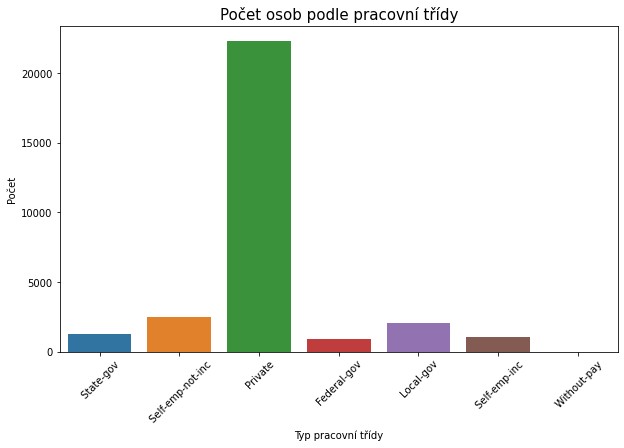

In [68]:
plt.figure(figsize=(10,6))
s =sns.countplot(x = df.workclass)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.title("Počet osob podle pracovní třídy", size=15)
plt.xlabel('Typ pracovní třídy')
plt.ylabel('Počet')
plt.show()

Přes 22 tisíc lidí pracuje v soukromém sektoru

## Zastoupení osob podle pohlaví

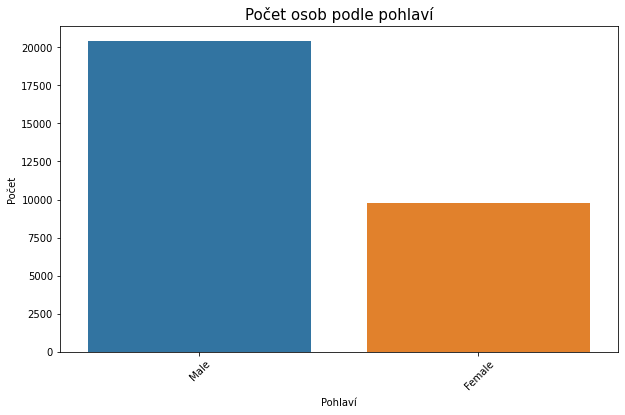

In [70]:
plt.figure(figsize=(10,6))
s =sns.countplot(x = df.sex)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.title("Počet osob podle pohlaví", size=15)
plt.xlabel('Pohlaví')
plt.ylabel('Počet')
plt.show()

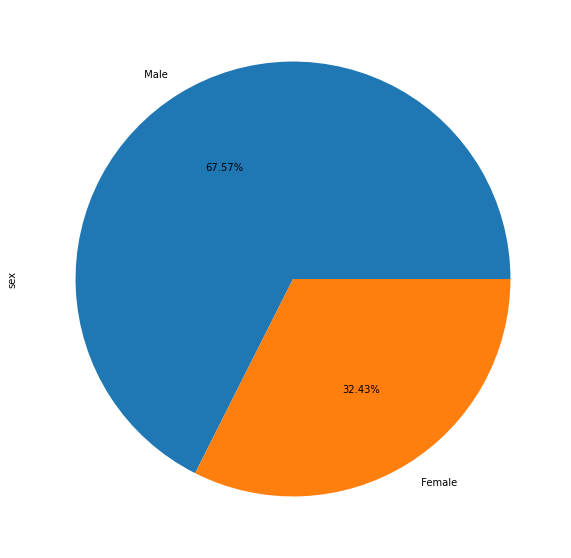

In [113]:
df["sex"].value_counts().plot(kind="pie", autopct='%.2f%%', figsize=(10,10));

V datasetu se nachází 2x více mužů než žen

## Zastoupení osob podle rasy

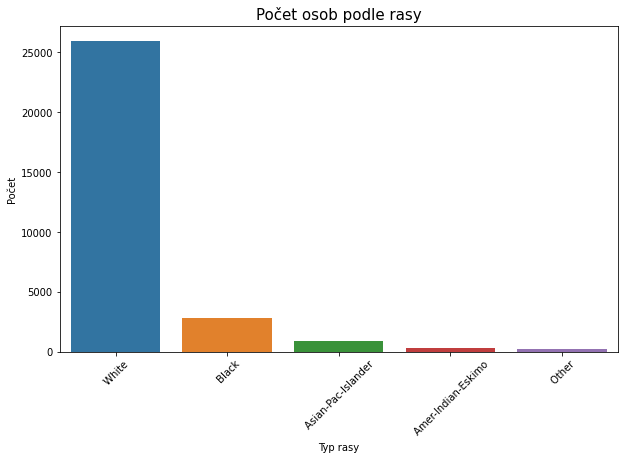

In [72]:
plt.figure(figsize=(10,6))
s =sns.countplot(x = df.race)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.title("Počet osob podle rasy", size=15)
plt.xlabel('Typ rasy')
plt.ylabel('Počet')
plt.show()

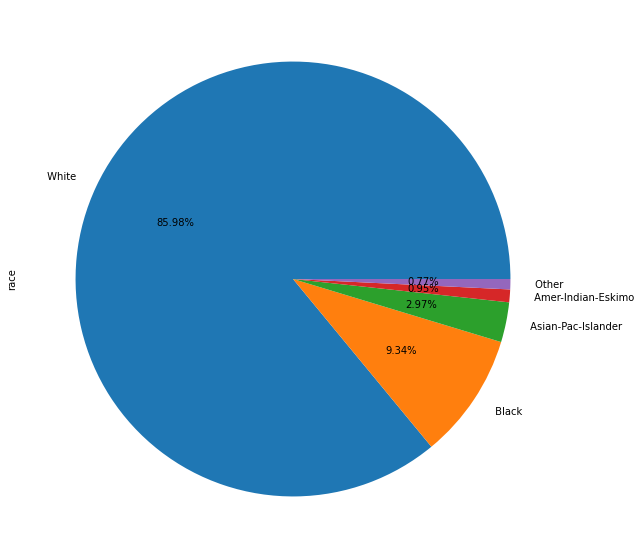

In [111]:
df["race"].value_counts().plot(kind="pie", autopct='%.2f%%', figsize=(10,10));

Největší zastoupení mají běloši

## Zastoupení osob podle manželského stavu

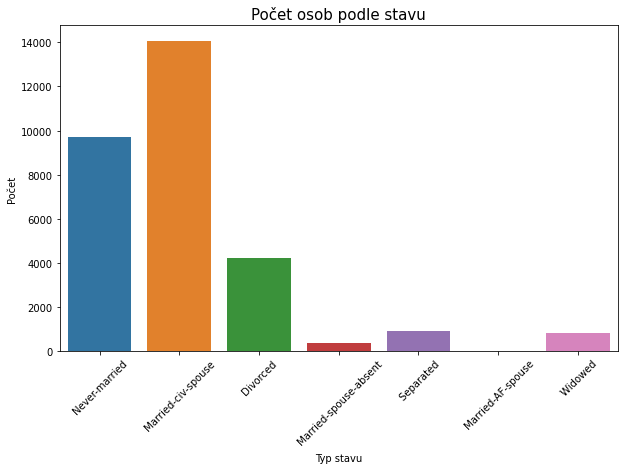

In [74]:
plt.figure(figsize=(10,6))
s =sns.countplot(x = df['marital-status'])
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.title("Počet osob podle stavu", size=15)
plt.xlabel('Typ stavu')
plt.ylabel('Počet')
plt.show()

Nejvíce osob a to cca 14000 je v manželském sňatku. Téměř 10000 osob nikdy sňatek neuzavřelo. Okolo 4000 je rozvedeno.

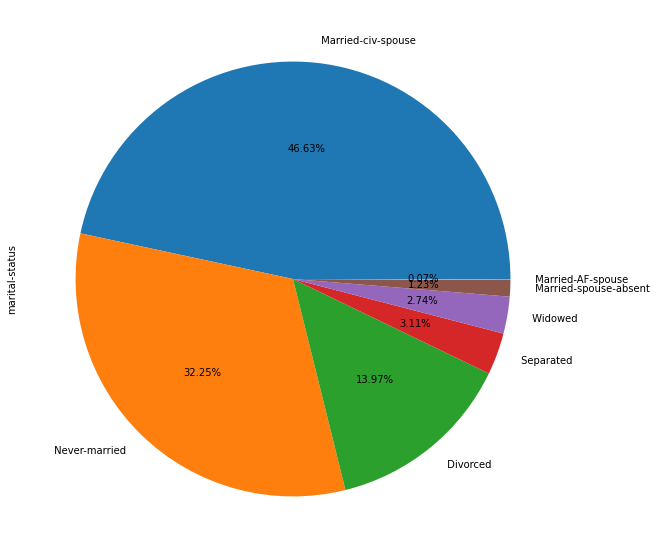

In [114]:
df["marital-status"].value_counts().plot(kind="pie", autopct='%.2f%%', figsize=(10,10));

## Zastoupení osob podle vztahu

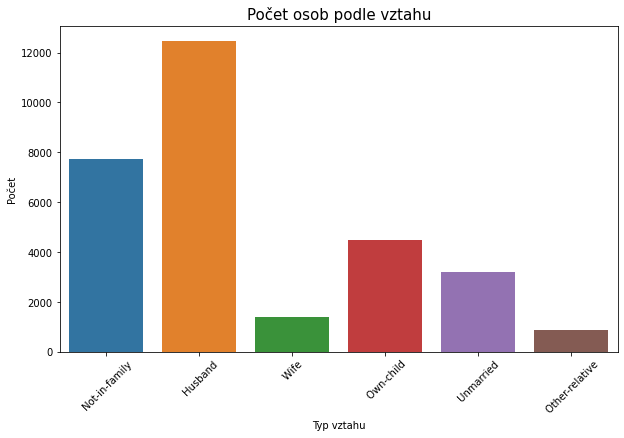

In [122]:
plt.figure(figsize=(10,6))
s =sns.countplot(x = df['relationship'])
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.title("Počet osob podle vztahu", size=15)
plt.xlabel('Typ vztahu')
plt.ylabel('Počet')
plt.show()

Nejvíce osob je ve skupině manžel a bez rodiny.

## Zastoupení osob, které mají příjmy větší nebo měnší než 50k$

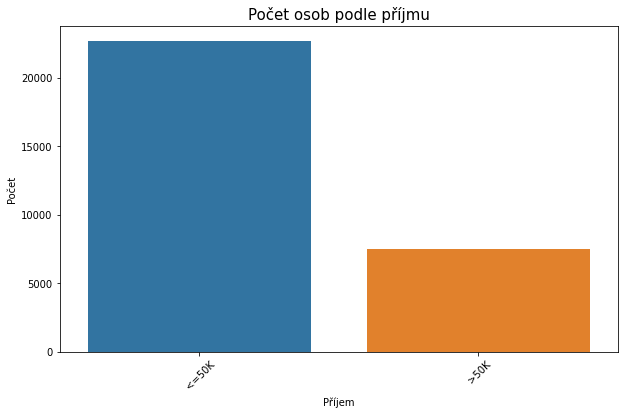

In [123]:
plt.figure(figsize=(10,6))
s =sns.countplot(x = df['class'])
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.title("Počet osob podle příjmu", size=15)
plt.xlabel('Příjem')
plt.ylabel('Počet')
plt.show()

cca 30000 osob má příjmy měnší než 50k$/rok. Pouze cca 7000 má více.

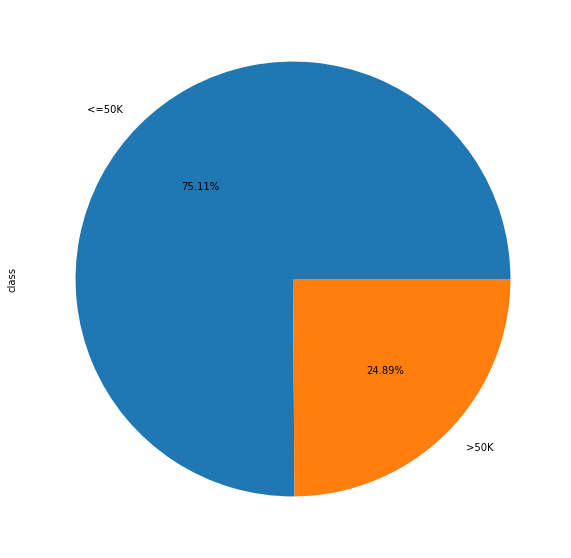

In [115]:
df["class"].value_counts().plot(kind="pie", autopct='%.2f%%', figsize=(10,10));

## Počet osob vydělávající více nebo méně než 50k podle vztahu 

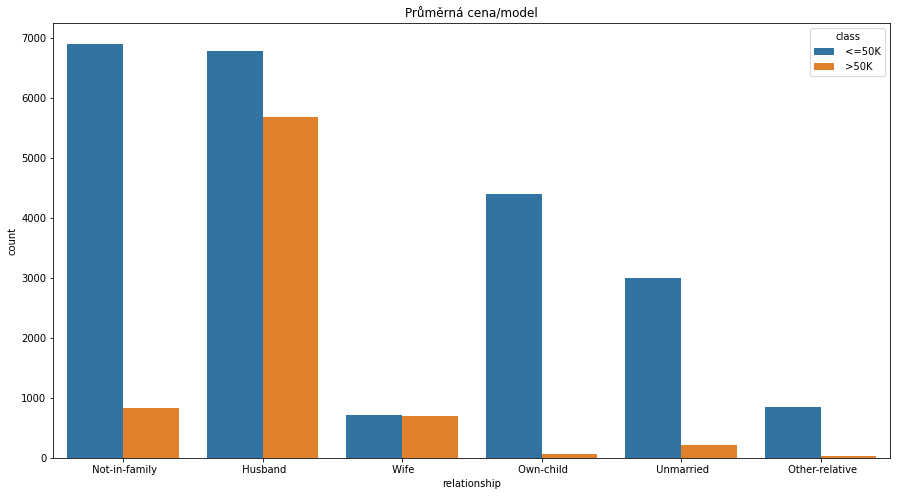

In [116]:
fig = plt.figure(figsize=(15,8))
plt.title("Průměrná cena/model")
sns.countplot(data=df, x="relationship", hue="class")
plt.show()

Vidíme, že u žen nehraje roli, jestli jsou vdané nebo ne. Obě skupiny zastupují stejný počet. Osob bez rodin, které vydělávají méně než 50k je daleko více než těch, kteří rodinu nemají a vydělávají více než 50k.

## Předzpracování dat

Pro kategorické hodnoty použijeme One-hot encoding

In [7]:
df_scaled = df
df_scaled = pd.get_dummies(df_scaled)

In [8]:
pd.set_option('display.max_columns', None)
df_scaled

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,class_ <=50K,class_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
32557,40,154374,9,0,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
32558,58,151910,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Odstraníme sloupec class_ <=50K a ponecháme si class_ >50K ten značí pokud je příjem větší než 50K = 1 jinak 0.

In [9]:
df_scaled = df_scaled.drop("class_ <=50K", axis = 1)
df_scaled

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,class_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,

In [12]:
df_scaled["class_ >50K"].value_counts()

0    22654
1     7508
Name: class_ >50K, dtype: int64

## Kontrola typů

In [13]:
df_scaled.dtypes

age                                int64
fnlwgt                             int64
education-num                      int64
capital-gain                       int64
capital-loss                       int64
                                   ...  
native-country_ Trinadad&Tobago    uint8
native-country_ United-States      uint8
native-country_ Vietnam            uint8
native-country_ Yugoslavia         uint8
class_ >50K                        uint8
Length: 89, dtype: object

## Rozdělení dat na vstupní a výstupní část

In [15]:
X, y = df_scaled.loc[:, df_scaled.columns != 'class_ >50K'], df_scaled.loc[:, 'class_ >50K']

In [16]:
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class_ >50K, dtype: uint8

# Rozdělíme si dataset do train a test setu v poměru 80:20

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24129, 88), (6033, 88), (24129,), (6033,))

## DecisionTree

In [19]:
clf = DecisionTreeClassifier()

In [20]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=uint8)

In [22]:
f1_score(y_test, y_pred)

0.6230383973288814

In [23]:
accuracy_score(y_test, y_pred)

0.8128625890933201

In [24]:
precision_score(y_test, y_pred)

0.6274377942165433

In [25]:
recall_score(y_test, y_pred)

0.6187002652519894

# Rozložení false/true positives/negatives

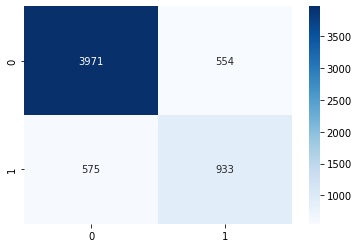

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues",fmt='d')

Protože, jsou třídy nevyvážené, použiji f1 score

# DecisionTree

In [28]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
np.mean(scores), np.min(scores), np.max(scores)

(0.6235846661003548, 0.6031851360318513, 0.639469320066335)

# MLP

In [48]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=(15,12), activation='relu', solver='adam', max_iter=1000, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
np.mean(scores), np.min(scores), np.max(scores)

(0.3813514509692725, 0.2957821676454885, 0.4191461836998706)

# RandomForest

In [34]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(max_depth=20, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
np.mean(scores), np.min(scores), np.max(scores)

(0.68603893209706, 0.674347158218126, 0.6946983546617916)

# Hyper-parameters tuning

# DecisionTree

In [49]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(criterion = 'entropy',random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
np.mean(scores), np.min(scores), np.max(scores)

(0.6319109732356507, 0.6245802552048354, 0.6404165310771234)

In [51]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(criterion = 'entropy',max_features= 'auto',random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
np.mean(scores), np.min(scores), np.max(scores)

(0.6093680296749102, 0.5960309451732256, 0.6252858542959817)

In [52]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(criterion = 'entropy',max_features= 'sqrt',random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
np.mean(scores), np.min(scores), np.max(scores)

(0.6093680296749102, 0.5960309451732256, 0.6252858542959817)

In [53]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(criterion = 'entropy',max_features= 'log2',random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
np.mean(scores), np.min(scores), np.max(scores)

(0.5967749216938744, 0.5841947315771925, 0.6088644451633776)

In [55]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(criterion = 'gini',max_features= 'log2')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
np.mean(scores), np.min(scores), np.max(scores)

(0.599144433006951, 0.5797297297297297, 0.6183480248122755)

In [56]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(criterion = 'gini',max_features= 'sqrt')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
np.mean(scores), np.min(scores), np.max(scores)

(0.6119256269501546, 0.5885947046843177, 0.6272817789578492)

In [57]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(criterion = 'gini',max_features= 'auto')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
np.mean(scores), np.min(scores), np.max(scores)

(0.6116915474614528, 0.597075824549473, 0.617686170212766)

# RandomForest

In [74]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(criterion='entropy',max_depth=20, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
np.mean(scores), np.min(scores), np.max(scores)

(0.6839342919990727, 0.6705336426914154, 0.6926184355490269)

In [75]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(criterion='entropy', random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
np.mean(scores), np.min(scores), np.max(scores)

(0.6804251059066619, 0.6644394951744618, 0.6898047722342734)

In [76]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(criterion='entropy',max_features='auto')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
np.mean(scores), np.min(scores), np.max(scores)

(0.6794627653247242, 0.6637069922308547, 0.6905797101449275)

In [77]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(criterion='entropy',max_features='log2')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
np.mean(scores), np.min(scores), np.max(scores)

(0.6772419628095013, 0.6646862235425176, 0.6821428571428572)

In [78]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(criterion='gini',max_features='log2')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
np.mean(scores), np.min(scores), np.max(scores)

(0.6771468650213582, 0.6569832402234637, 0.6859766866831508)

In [79]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(criterion='gini',max_features='auto')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
np.mean(scores), np.min(scores), np.max(scores)

(0.6789545439738017, 0.6654384672070744, 0.6866209880995312)

# MLP

In [71]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=(15,12), activation='tanh', solver='adam', max_iter=1000, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
np.mean(scores), np.min(scores), np.max(scores)

(0.012975643011156179, 0.0, 0.03619909502262444)

In [73]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=(15,12), activation='logistic', solver='lbfgs', max_iter=10000, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
np.mean(scores), np.min(scores), np.max(scores)

(0.17941965581369484, 0.01955671447196871, 0.30530973451327437)

## Tabulka

| Algorithm | Parameters | Metrics score (mean) | 
 | --- | --- | --- |
 | DecisionTree | default | 0.6235846661003548 |
 | MLPClassifier |hidden_layer_sizes=(15,12), activation='relu', solver='adam', max_iter=1000, random_state=13 | 0.3813514509692725|
 | RandomForest | max_depth=20, random_state=13 | 0.68603893209706 |
  | DecisionTree | criterion = 'entropy',random_state=13 | 0.6319109732356507 |
   | DecisionTree | criterion = 'entropy',max_features= 'auto',random_state=13 | 0.6093680296749102 |
    | DecisionTree | (criterion = 'entropy',max_features= 'sqrt',random_state=13 | 0.6093680296749102 |
     | DecisionTree | criterion = 'entropy',max_features= 'log2',random_state=13 | 0.5967749216938744 |
      | DecisionTree | criterion = 'gini',max_features= 'log2' | 0.599144433006951 |
       | DecisionTree | criterion = 'gini',max_features= 'sqrt' | 0.6119256269501546 |
        | DecisionTree | criterion = 'gini',max_features= 'auto' | 0.6116915474614528 |
   | RandomForest | criterion='entropy',max_depth=20, random_state=13 | 0.6839342919990727 |
    | RandomForest | criterion='entropy', random_state=13 | 0.6804251059066619 |
     | RandomForest | criterion='entropy',max_features='auto' | 0.6794627653247242 |
      | RandomForest | criterion='entropy',max_features='log2' | 0.6772419628095013 |
       | RandomForest | criterion='gini',max_features='log2' | 0.6771468650213582 |
        | RandomForest |criterion='gini',max_features='auto' | 0.6789545439738017 |
        | MLP |hidden_layer_sizes=(15,12), activation='tanh', solver='adam', max_iter=1000, random_state=13 | 0.012975643011156179 |
   | MLP |hidden_layer_sizes=(15,12), activation='logistic', solver='lbfgs', max_iter=10000, random_state=13 | 0.17941965581369484 |

## Závěr

Predikovali jsme zařezení člověka do příjmové skupiny, jestli vydělává více nebo méně než 50 000$ ročne v závislosti na určitých údajích této osoby.

Nejvíce úspěšný byl algoritmus RandomForest a to s úspěšností 68%. Naopak algoritmus MLP úplně pohořel a nedostal se přes 40%.

Algoritmus DecisionTree s nastavením criterion = 'entropy',random_state=13 dosáhl 63%